# A Survey-Based Exploration of Music's Impact on Mental Health




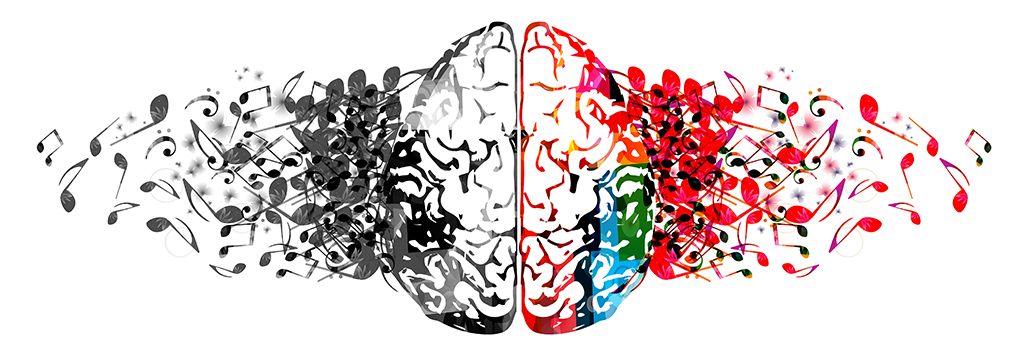

Source: (Music and the Brain, n.d.)

The aim of this project is to conduct an Exploratory Data Analysis (EDA) on a Kaggle Dataset related to Music & Mental Health Survey Results (Music & Mental Health Survey Results, 2022). We aim to investigate, whether there are correlations between participants' favourite music genres and their mental health. The data set used here is based on self-reported music listening habits. The data is subjective to the accuracy of self-reporting, and the causation of the effect of music on listeners cannot be determined from the data provided. The EDA will involwe:

*   Checking the characteristics of the data
*   Cleaning and processing the data
*   Using visualization tools to gather insights

The ultimate goal is to identify correlations between music listening habits and their effects on mental health symptoms, which could lead to the contribution of a more informed application of the use of music for mental health support and prevention.

Our motivation for the given data comes from the constantly increasing numbers of mental health disorders, especially among the young population. According to statistics, in 2019, 970 million people or 1 in every 8 people around the world suffered from mental health disorders (Mental Disorders, 2022). Reportedly, anxiety and depressive disorder are the most frequently occurring (GBD Results, n.d.). Furthermore, during the COVID-19 pandemic in just one year, depressive disorder and anxiety rose significantly, estimated to 26% and 28% respectively (Headquarters, 2022). We hope that this EDA will be at least a small contribution towards further scientific research for the benefits of mental health.


In [ ]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Load the dataset
df = pd.read_csv('mxmh_survey_results.csv')

## Inspection of the dataset

To get a better understanding of the  dataset at hand, let's first look at a number of sample entries.

In [ ]:
# Inspect the first 5 rows
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


Then, we are going to examine the overall "shape" of the dataset and the variables it contains.

In [ ]:
# Checking the column names
col_names = "\n".join([name for name in list(df.columns)])

# Checking the shape
print(f"The dataset contains {df.shape[0]} entries from different participants for {df.shape[1]} distinct variables. The variables are: \n{col_names}")

The dataset contains 736 entries from different participants for 33 distinct variables. The variables are: 
Timestamp
Age
Primary streaming service
Hours per day
While working
Instrumentalist
Composer
Fav genre
Exploratory
Foreign languages
BPM
Frequency [Classical]
Frequency [Country]
Frequency [EDM]
Frequency [Folk]
Frequency [Gospel]
Frequency [Hip hop]
Frequency [Jazz]
Frequency [K pop]
Frequency [Latin]
Frequency [Lofi]
Frequency [Metal]
Frequency [Pop]
Frequency [R&B]
Frequency [Rap]
Frequency [Rock]
Frequency [Video game music]
Anxiety
Depression
Insomnia
OCD
Music effects
Permissions


Next, we are checking if our dataset contains some duplicate entries.

In [ ]:
# Identify duplicate rows
duplicates = df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", sum(duplicates))

Number of duplicate rows: 0


It turns out that there are no duplicates in the data. Then we also check if there are entries where values for a variable are missing (which will most likely be the case as the data was collected via a Google form and answering "harder" questions was optional).

In [ ]:
# Identify missing values 
missing = df.isnull().sum()

# Print the missing values
print(f"Missing values: {missing}")

Missing values: Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety     

As we can see, there are 8 columns for which there are entries with missing values. Most of the columns have only a few entries. However, the BPM column has 107 entries with `null` values, which is 14.5% of the data. So we will not omit them, but fill them in later. Before that, however, we will examine the data types of the various columns.

In [ ]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Out of 33 columns 26 columns are `object` type and rest are `numeric` type.

The last thing we need to do now is to make sure that everyone who have participated has actually given their consent.

In [ ]:
# Check if everybode gave permission
print(df[df["Permissions"] == "I understand."]["Permissions"].count() == df["Permissions"].count())

True


## Transformation of the dataset

After getting to know the characteristics of the dataset better, we will move on to the data transformation stage.

### Removing outliers

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


The `3rd quartile` and `max` of `Age`, `Hours per day`, and `BPM` show large differences. Meaning that these columns are likely to contain some outliers. 

Therefore, we decided to use histograms to give us a better understanding and overview of the distribution for these variables. Using a histogram gives us the opportunity to visually see if there are outliers and to understand how outliers behave in relation to the rest of the data.

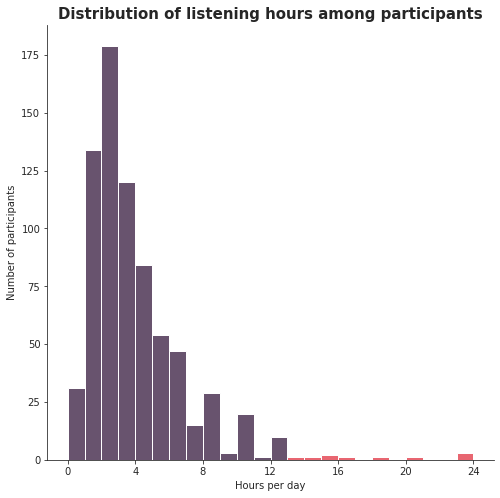

In [ ]:
# Set the style for the plot
sns.set_style("ticks")
colors = sns.color_palette("rocket")[0:4:3]

fig, ax = plt.subplots(figsize=(8,8))

# Plot the histogram up to the first outlier
sns.histplot(data=df, x='Hours per day', binwidth=1., binrange=(df['Hours per day'].min(),13.), color=colors[0])
# Plot a histogram with adifferent color after the first outlier
sns.histplot(data=df, x='Hours per day', binwidth=1., binrange=(13.,df['Hours per day'].max()), color=colors[1], ax=ax)
# Remove the upper and right spine
sns.despine()

# Change the xticks and ylabel and add a title
plt.xticks(np.arange(0, 24+1, 4))
ax.set_ylabel('Number of participants')
ax.set_title('Distribution of listening hours among participants', fontsize=15, fontweight='bold')

plt.show()

**Distribution of listening hours among participants.**  Within the histogram, it can be seen that the majority of participants tend to listen to music between 2 and 4 hours per day with a peak of 175 counts for 3 hours.  Since there is a visible decrease after 13 hours and given that people sleep for around 8 hours, and therefore listening to more than 13 hours of music per day is rare, we decided to exclude all participants that listened to more than 13 hours per day (marked as red).

In [ ]:
# Printing the number of participants that listen to more than 15h of music a day:
hpd_outliers = df[df["Hours per day"] > 13]
hpd_outliers_num = len(hpd_outliers)
hpd_outliers_percentage = np.round((hpd_outliers_num/df.shape[0])*100, 2)
print(f"There are {hpd_outliers_num} paricipants that listen to more than 13 hours of music per day. They make up {hpd_outliers_percentage}% of the data")

There are 9 paricipants that listen to more than 13 hours of music per day. They make up 1.22% of the data


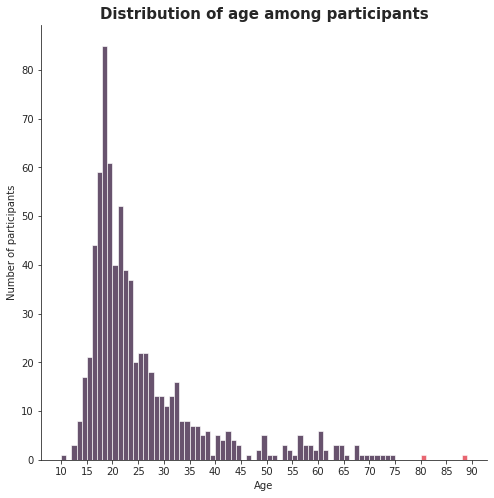

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot the histogram up to the first outlier
sns.histplot(data=df, x='Age', binwidth=1, binrange=(df['Age'].min(),75.), color=colors[0])
# Plot a histogram with adifferent color after the first outlier
sns.histplot(data=df, x='Age', binwidth=1, binrange=(75.,df['Age'].max()), color=colors[1], ax=ax)
# Remove the upper and right spine
sns.despine()

# Change the xticks and ylabel and add a title
plt.xticks(np.arange(df['Age'].min(), df['Age'].max()+2, 5.))
ax.set_ylabel('Number of participants')
ax.set_title('Distribution of age among participants', fontsize=15, fontweight='bold')

plt.show()

**Distribution of age among participants.** Within the histogram, it can be seen that the majority of participants are between 16 and 24 years with a peak of over 80 participants being 17 years old. Starting at 24 years old the number of participants decreases slowly. Since there is a visible gap after the age of 75 and only a few participants that are older, we decided to exclude all participants that are older than 75 (marked as red).

In [ ]:
# Printing the number of participants that are older than 60 years:
age_outliers = df[df["Age"] > 75]
age_outliers_num = len(age_outliers)
age_outliers_percentage = np.round((age_outliers_num/df.shape[0])*100, 2)
print(f"There are {age_outliers_num} paricipants that are older than 75 years. They make up {age_outliers_percentage}% of the data")

There are 2 paricipants that are older than 75 years. They make up 0.27% of the data


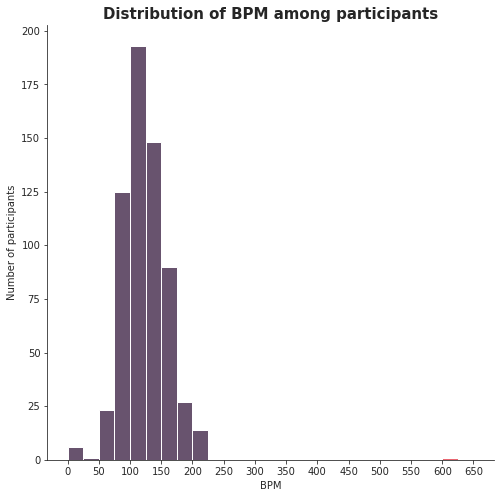

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot the histogram up to the first outlier
sns.histplot(data=df, x="BPM", binwidth=25, binrange=(df['BPM'].min(), 500), color=colors[0])
# Plot a histogram with adifferent color after the first outlier
sns.histplot(data=df, x="BPM", binwidth=25, binrange=(500, 650), color=colors[1], ax=ax)
# Remove the upper and right spine
sns.despine()

# Change the xticks and ylabel and add a title
plt.xticks(np.arange(df['BPM'].min(), 651, 50))
ax.set_ylabel('Number of participants')
ax.set_title('Distribution of BPM among participants', fontsize=15, fontweight='bold')

plt.show()

**Distribution of BPM (beats per minute) among participants.** Within the histogram, it can be seen that the most common BPMs are between 100 to 150 with counts of 125 to 190. Since there is a visible gap after a BPM of 225, we decided to exclude all participants that are listening to a faster BPM than 225 (marked as red).

In [ ]:
# Printing the number of participants that listen to music with more than 250 BPM:
bpm_outliers = df[df['BPM'] >= 250]
bpm_outliers_num = len(bpm_outliers)
bpm_outliers_percentage = np.round((bpm_outliers_num/df.shape[0])*100, 2)
print(f"There are {bpm_outliers_num} paricipants that listen to music with more than 250 BPM. They make up {bpm_outliers_percentage}% of the data")

There are 2 paricipants that listen to music with more than 250 BPM. They make up 0.27% of the data


In [ ]:
# Get a set of all the outliers indices 
outliers_idx = set(hpd_outliers.index.tolist() + age_outliers.index.tolist() + bpm_outliers.index.tolist())
outliers_num = len(outliers_idx)
outliers_percentage = np.round((outliers_num/df.shape[0])*100, 2)
print(f"There are {outliers_num} outliers, which make up {outliers_percentage}% of the data")

# View outlier entries
df.loc[outliers_idx]

There are 12 outliers, which make up 1.63% of the data


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
290,8/29/2022 2:46:27,27.0,Spotify,20.0,Yes,No,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Sometimes,8.0,10.0,10.0,8.0,No effect,I understand.
644,9/13/2022 1:55:43,16.0,Other streaming service,4.0,Yes,No,No,EDM,Yes,Yes,...,Never,Never,Never,Sometimes,4.0,7.0,1.0,3.0,Improve,I understand.
485,9/1/2022 19:08:55,55.0,YouTube Music,15.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,3.0,0.0,No effect,I understand.
359,8/29/2022 11:02:29,16.0,Spotify,15.0,Yes,Yes,Yes,EDM,Yes,No,...,Never,Very frequently,Very frequently,Sometimes,8.0,10.0,9.0,2.0,Improve,I understand.
695,9/28/2022 17:25:48,89.0,Spotify,24.0,Yes,Yes,Yes,Rap,No,No,...,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect,I understand.
366,8/29/2022 12:32:30,16.0,Spotify,24.0,Yes,No,No,Rock,Yes,Yes,...,Rarely,Rarely,Sometimes,Rarely,5.0,1.0,9.0,1.0,Improve,I understand.
527,9/2/2022 14:09:04,80.0,I do not use a streaming service.,3.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,7.0,3.0,9.0,2.0,Improve,I understand.
18,8/27/2022 23:40:55,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve,I understand.
726,10/23/2022 20:50:27,18.0,Apple Music,18.0,Yes,No,No,EDM,Yes,No,...,Sometimes,Sometimes,Sometimes,Sometimes,9.0,8.0,5.0,10.0,Improve,I understand.
407,8/29/2022 23:20:48,26.0,Spotify,14.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,5.0,10.0,8.0,0.0,No effect,I understand.


Now that we identified the outliers, we are going to drop them.

In [ ]:
# Drop the outliers
df = df.drop(outliers_idx)

# Check if they were dropped
print(df.shape[0])

724


### Filling in missing values

As described above, there are many entries with missing values in this dataset, which is why we will fill them in and not simply drop them. An exception here are entries with `null` values for the `Music effects` variable. Since this variable is essential for our analysis goal and since there is no way to tell how music impacted the listening habits of the participant, we will drop these entries.

In [ ]:
# Drop the entries where music effects variable is blank
df = df.dropna(subset = ['Music effects'])

# Check if they were dropped
print(df.shape[0])

716


For entries with a missing value in the `BPM` column, we will fill it with the mean value of the BPM of the participants' favourite genre.

In [ ]:
# Get a list of the genres that have entries which are missing a value for the BPM column
bpm_null = df[df['BPM'].isnull() == True]
genre_bmp_null = list(bpm_null['Fav genre'].unique())
print(genre_bmp_null)

# Fill in the values for the BPM column with the mean value of the BPM of the participants' favourite genre 
for genre in genre_bmp_null:
    df['BPM'] = df['BPM'].fillna(round(df[df['Fav genre']==genre]['BPM'].mean(), 0))

['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical', 'Video game music', 'R&B', 'Folk', 'Jazz', 'Gospel', 'Rap']


For all other entries we'll use the `mode` to fill in the blank values in categorical columns and the `mean` for the ones in numerical columns. 

In [ ]:
# Fill the null values in all categorical columns with the mode and in all numerical columns with the mean
for col in df:
    if df[col].isnull().any():
        if df[col].dtype == 'O':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(round(df[col].mean(), 0))

# Check if there are any missing values left
missing = df.isnull().sum()
missing

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

### Cleaning the data

In order to leave he data in the best possible form for later visualizations, we are going to remove unnecessary columns such as `Timestamp` and `Permissions` that do not give us any insights.

In [ ]:
# Drop unnecessary columns
df = df.drop(columns = ["Permissions", "Timestamp"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           716 non-null    float64
 1   Primary streaming service     716 non-null    object 
 2   Hours per day                 716 non-null    float64
 3   While working                 716 non-null    object 
 4   Instrumentalist               716 non-null    object 
 5   Composer                      716 non-null    object 
 6   Fav genre                     716 non-null    object 
 7   Exploratory                   716 non-null    object 
 8   Foreign languages             716 non-null    object 
 9   BPM                           716 non-null    float64
 10  Frequency [Classical]         716 non-null    object 
 11  Frequency [Country]           716 non-null    object 
 12  Frequency [EDM]               716 non-null    object 
 13  Frequ

The dataset contains several columns that provide information about the frequency with which the respondent listens to different music genres. For a better understandibility and easier access we are goining to rename these columns so that they only contain the name of the music genre. We will also shorten some column names, such as `Primary streaming service`.

In [ ]:
# Rename columns for ease of use
df = df.rename(columns = {'Primary streaming service': 'Streaming service',
                          'Frequency [Classical]': 'Classical',
                          'Frequency [Country]': 'Country',
                          'Frequency [EDM]': 'EDM',
                          'Frequency [Folk]': 'Folk',
                          'Frequency [Gospel]': 'Gospel',
                          'Frequency [Hip hop]': 'Hip hop',
                          'Frequency [Jazz]': 'Jazz',
                          'Frequency [K pop]': 'K pop',
                          'Frequency [Latin]': 'Latin',
                          'Frequency [Lofi]': 'Lofi',
                          'Frequency [Metal]': 'Metal',
                          'Frequency [Pop]': 'Pop',
                          'Frequency [R&B]': 'R&B',
                          'Frequency [Rap]': 'Rap',
                          'Frequency [Rock]': 'Rock',
                          'Frequency [Video game music]': 'Game music'})


In addition, we will also change/shorten some column values for ease of use and a better look when used in a graph.

In [ ]:
# Rename column values for ease of use
df["Streaming service"] = df["Streaming service"].replace({'I do not use a streaming service.': 'None', 'Other streaming service': 'Other'})
df["Fav genre"] = df["Fav genre"].replace({'Video game music': 'Game music'})

# Check if it worked
print(df["Fav genre"].unique(), df["Streaming service"].unique())

['Game music' 'Jazz' 'R&B' 'K pop' 'Rock' 'Country' 'EDM' 'Hip hop' 'Pop'
 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel' 'Latin'] ['Spotify' 'YouTube Music' 'None' 'Apple Music' 'Other' 'Pandora']


The dataset contains 4 columns that provide information on how respondents rate their anxiety, depression, insomnia and OCD on a scale from 0 to 10. There are a few who have made a more fine-grained assessment and have entered `.5' values there instead of using steps of one.  We will round these values so that they do not influence the evaluation and so that the graphs look better and more uniform later on. 




In [ ]:
# Round the values for all 4 the mental health disorder columns
df[['Anxiety', 'Depression', 'Insomnia', 'OCD']] = df[['Anxiety', 'Depression', 'Insomnia', 'OCD']].round(0).astype('int16')

## Data exploration

Now that the data is properly cleaned and transformed, we can start the analysis. We will first do some graphical visualisations to gather some basic information about the background of the participants and then do a more in-depth analysis about the impact of music on mental health disorders.

### Visualization: Participants background

**1. Question: How is the distribution of the data, focused on Hours per day and Age?**

With this question, we want to get a better understanding of where the data came from in regard to the majority of participants i.e. the distribution and relation between age and hours per day among the participants. We decided to use a heatmap here because it allows having a nice clear visual input about where two variables cluster, indicated by darker areas.

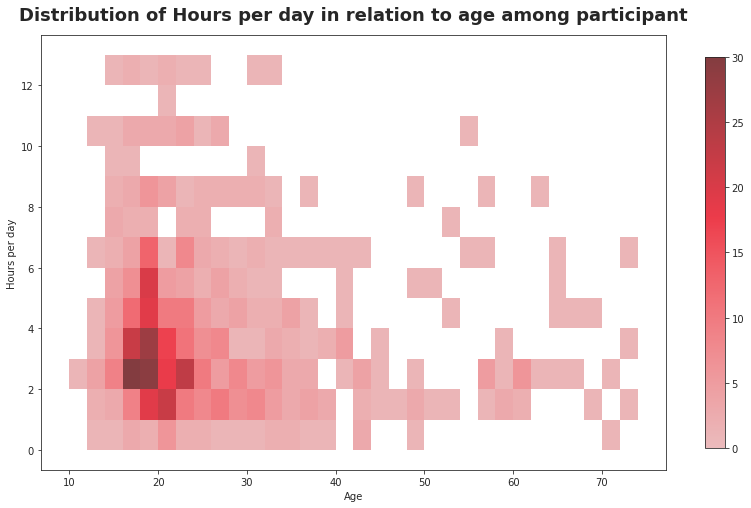

In [ ]:
# Set the style for the plot
sns.set_style("ticks")
color = sns.color_palette("rocket")[3]

fig, ax = plt.subplots(figsize=(14,8))
# Define the histogram/heatmap 
sns.histplot(data=df, y='Hours per day', x="Age", color=color, binwidth=(2, 1), cbar=True, cbar_kws=dict(shrink=.9))
# Set a title for the plot
ax.set_title('Distribution of Hours per day in relation to age among participant', y=1.02, fontsize=18, fontweight='bold')

plt.show()

**Distribution of Hours per day in relation to age among participants.** Within the heatmap, it can be seen that the majority of all data is collected from participants around the age of 15 to 25, with listening hours from 1 to 6 hours per day.


**2. Question: What is the distribution for the four different mental health disorders by rating?**

With this question, we want to explore, how the different mental health disorders (anxiety, depression, OCD, insomnia) were rated by the participants and if there are similarities or differences between the ratings. We decided to use two different plots, a box plot and a count plot, in order to explore the distribution of mental health disorders by rating. A box plot has the advantage of an interquartile range, showing very clearly where the majority (actually 50%) of the data lies. Furthermore, it gives the median. The count plot, on the other hand, gives a much more in detail view of the distribution based on the count of the given ratings, allowing us to understand visually how the interquartile range emerges. To explore the findings further, we also used a PairGrid, which can be used to plot the pairwise relationships of different variables in a dataset. With that, the relationship between how participants rated all four mental health disorders individually can be seen.

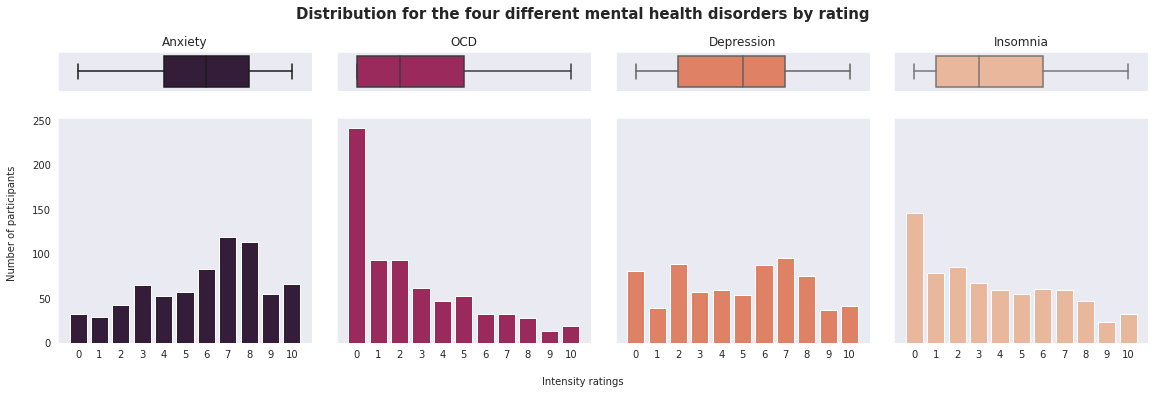

In [ ]:
# Set the style of the plot
sns.set_style("dark")
colors = sns.color_palette("rocket")

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,5), sharex=True, sharey='row', gridspec_kw={"height_ratios": (.15, .85)})

# Plot a countplot and a boxplot above it
sns.countplot(x=df['Anxiety'].astype('category'), color=colors[0], ax=ax[1,0]) # change the ratings to categorical type in order to use countplot
sns.boxplot(x=df['Anxiety'], color=colors[0], ax=ax[0,0])
ax[0,0].set_title('Anxiety')

sns.countplot(x=df['OCD'].astype('category'), color=colors[2], ax=ax[1,1])
sns.boxplot(x=df['OCD'], color=colors[2], ax=ax[0,1])
ax[0,1].set_title('OCD')

sns.countplot(x=df['Depression'].astype('category'), color=colors[4], ax=ax[1,2])
sns.boxplot(x=df['Depression'], color=colors[4], ax=ax[0,2])
ax[0,2].set_title('Depression')

sns.countplot(x=df['Insomnia'].astype('category'), color=colors[5], ax=ax[1,3])
sns.boxplot(x=df['Insomnia'], color=colors[5], ax=ax[0,3])
ax[0,3].set_title('Insomnia')

# Delete all x- and ylabels 
for ax in ax.flat:
    ax.set(xlabel=' ', ylabel=' ')

# Add custom x- and ylabels
fig.text(0., 0.45, 'Number of participants', va='center', rotation='vertical')
fig.text(0.5, 0., 'Intensity ratings', ha='center')

plt.tight_layout()
# Add a suptitle
plt.suptitle('Distribution for the four different mental health disorders by rating', y=1.05, fontsize=15, fontweight='bold')

plt.show()

**Distribution for the four different mental health disorders by rating.** The different mental health disorders are: anxiety, depression, OCD and insomnia. A scale from 0 to 10 was used for the rating. 0 equals “I do not experience this” to 10 equals “ I experience this regularly, constantly/or to an extreme”. Overall, it can be seen within the bar plot and histogram, that for each disorder a rating from 0 to 10 was given among the participants. Anxiety is the highest-rated experienced disorder (median 6), OCD the lowest-rated one (median 2) and depression (median 5) and insomnia (median 3) are rated similarly moderate, with insomnia being rated slightly less. More information about the distribution is given by the interquartile range (50% of all ratings given) and count. The interquartile range for anxiety lies between a rating of 4 and 8, with counts of up to 120 for 7 and 8,  indicating that anxiety is experienced frequently and rather strongly among the participants.  For OCD the interquartile range lies between 0 and 5, indicating that if OCD is experienced, it is experienced rather weak among participants. This is also very strongly indicated by the count of 250 for 0 within OCD. Depression and insomnia are experienced among participants moderately. The interquartile range for depression is between 2 and 7 and for insomnia between 1 and 6. The count for depression is very equally distributed with counts around 50 to 100 for each rating. That insomnia is overall rated slightly less than depression can be seen within the fact that the count shows a decrease from 0 to 10, with a strong decrease between a count of 150 for 0 and 100 for 1.

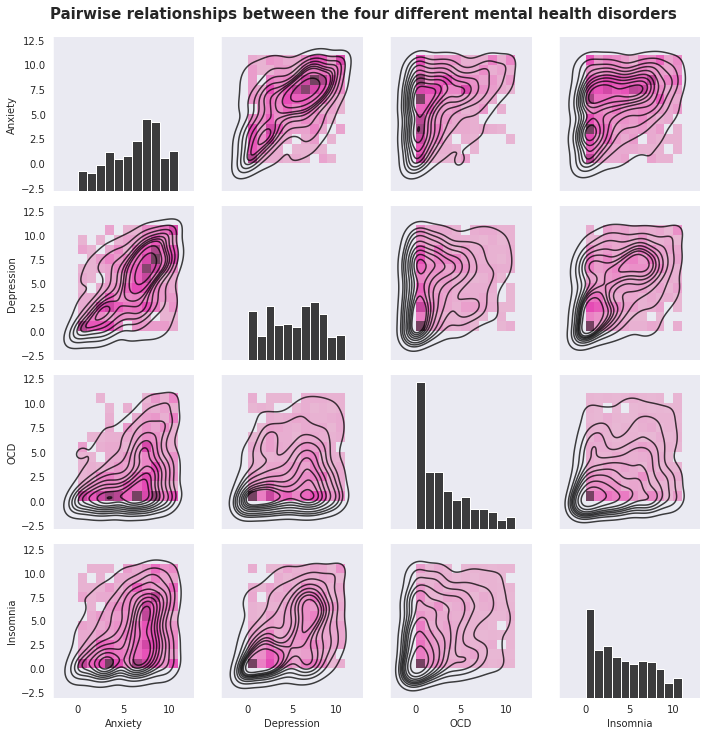

In [ ]:
# Set the style of the plot
sns.set_style('dark')
color = sns.color_palette('rocket')[1]

# Create a PairGrid
grid = sns.PairGrid(df, vars=['Anxiety', 'Depression', 'OCD', 'Insomnia'])
# Plot histogram on the diagonal and a histplot/heatmap overlaid with a kdeplot elsewhere.
grid.map_diag(sns.histplot, binwidth=1, binrange=(0,11), color='black')
grid.map_offdiag(sns.kdeplot, color='black', alpha=.75)
grid.map_offdiag(sns.histplot, color=color, binwidth=1, binrange=(0,11))

# Add a suptitle
plt.suptitle('Pairwise relationships between the four different mental health disorders', y=1.02, fontsize=15, fontweight='bold')

plt.show()

**Pairwise relationships between the four different mental health disorders.** Through this PairGrid, the relationships between the different mental health disorders can be identified. For example, participants with low anxiety ratings (≤ 5) also provided depression ratings in this range, while those with high anxiety ratings (> 5) are also in the high range for depression ratings.  A slight linear trend can be seen. The OCD rating is mainly 0, regardless of the anxiety rating. The participants with a low anxiety rating (≤ 5) mainly gave insomnia ratings around 0. However, for high anxiety ratings (> 5, mainly between 6 and 8), the insomnia ratings are in a wide range from 0-6. Regardless of their depression rating, the OCD rating for most participants is also around 0. Participants with a depression rating between 0 and 3 also reported insomnia ratings in this range, while participants with a depression rating between 6 and 7 reported insomnia ratings of 5-7. Finally, for the relationship between insomnia and OCD, the OCD ratings are mostly 0, regardless of the insomnia ratings.

With the next three questions, we further explore some variables to get a better understanding of the data. We wanted to have a look at the distribution of the favourite genre (question 3), the streaming services by popularity (question 4) and if participants listen to music while working (question 5). Count and pie plots are very simple but powerful when it comes to visualising distribution based on counts or percentiles. We used a count plot for the favourite genres to have a visual input about how they are distributed. Since the favourite genres have 16 variables, it would have been too clustered to use a pie plot here in our opinion. However, we used pie plots for the two following questions (questions 4 and 5), since the variables are fewer there, and the percentiles provide a good visual overview of the distribution.

**3. Question: What is the distribution of favourite genres among participants?**

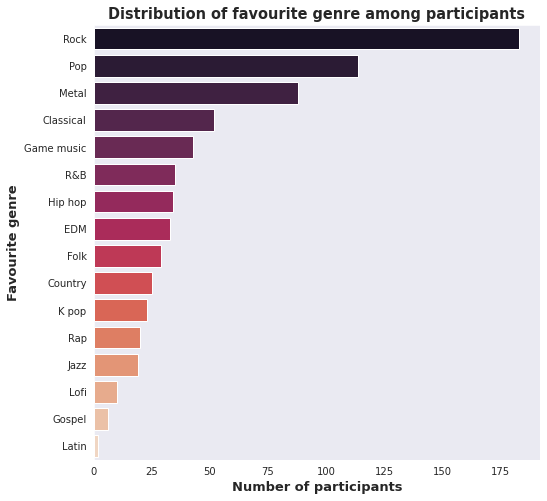

In [ ]:
# Set the style of the plot
sns.set_style('dark')

fig, ax = plt.subplots(figsize=(8,8))

# Create a countplot
sns.countplot(y=df['Fav genre'], order=df['Fav genre'].value_counts().index, palette='rocket')

# Set the x- and ylabel as well as the title for the plot
ax.set_xlabel('Number of participants',  fontweight='bold', fontsize=13)
ax.set_ylabel('Favourite genre', fontweight='bold', fontsize=13)
ax.set_title('Distribution of favourite genre among participants', fontsize=14.5, fontweight='bold')

plt.show()

**Distribution of favourite genres among participants.** Within the count plot, it can be seen that Rock is with a count of above 175 the favourite genre. Pop and Metal are with a count of around 115 and around 90, second and third most favourite genres. All other genres lie below a count of 52. Latin is the least favourite genre with a count of 1. 

**4. Question: What is the distribution of the streaming services by popularity among participants?**

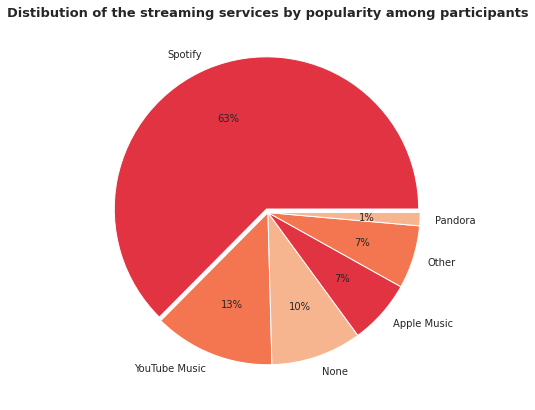

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

# Get the counts and respective labels
services = df['Streaming service'].value_counts()
labels = df['Streaming service'].unique()

# Create the pie diagram
plt.pie(x=services,
        labels=labels,
        pctdistance=0.65,
        explode=[0.025, 0, 0, 0, 0, 0],
        colors = sns.color_palette('rocket')[3:9],
        autopct='%.0f%%')

# Set the title and delete the ylabel
plt.title('Distibution of the streaming services by popularity among participants', fontsize=13, fontweight='bold')
plt.ylabel("")

plt.show()

**Distribution of the streaming services by popularity among participants.** Within the pie plot, it can be seen that Spotify is the most popular with 63%. YouTube music is used by 13% of participants and Apple Music by 7%. Only 1 % is using Pandora and 8% stated to use other services than mentioned. 10% of participants stated that they are not using any streaming service.

**5. Question: What is the distribution of participants listening to music while working versus listening outside of the working hours?**

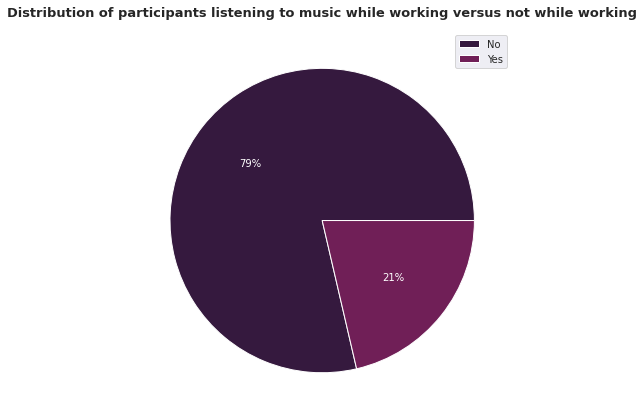

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

# Get the counts and respective labels

while_working = df['While working'].value_counts()
labels = df['While working'].unique()

# Create the pie diagram
plt.pie(x=while_working,
        labels=labels,
        labeldistance=None,
        textprops=dict(color="w"),
        colors = sns.color_palette('rocket')[0:2],
        autopct='%.0f%%')

# Delete the ylabel and add a title + a legend
plt.title('Distribution of participants listening to music while working versus not while working', y=1.02, fontsize=13, fontweight='bold')
plt.ylabel("")
plt.legend(loc='upper right', fontsize='medium')

plt.show()

**Distribution of participants listening to music while working versus not while working.** Within the pie plot, it can be seen that with a percentage of 79%, the majority of participants do not listen to music while working (dark purple). 21% of the participants stated that they listen to music while working (pink).

### Analysis: Mental health disorders

**6. Question: Is there a correlation between mental health disorders and hours of listening per day or age?**

Starting with this question we wanted to look deeper into the data. We already saw within question 1 that the majority of all data is by participants around the age of 15 to 25, with listening hours from 1 to 6 hours per day. Question 2 gave an overview of how the different mental health disorders were rated by the participants and if there are similarities or differences between the ratings. Here we aim to have a better understanding of how the different mental health disorders correlate with “age” and “hours per day”, but also may with each other.  We decided to use both, the table and the matrix. The table does provide a cleaner overview of the different values of the correlation coefficient, while the matrix gives a visual input about the different strengths of correlations, through the colour spectrum.

In [ ]:
# Create a DataFrame indicating how the different mental health disorders correlate with “age” and “hours per day”
df_=df[['Anxiety','Insomnia','Depression','OCD','Age','Hours per day']]
df_corr = df[['Anxiety','Insomnia','Depression','OCD','Age','Hours per day']].corr()
round(df_corr,2)

,Anxiety,Insomnia,Depression,OCD,Age,Hours per day
Anxiety,1.00,0.29,0.52,0.34,-0.17,0.08
Insomnia,0.29,1.00,0.37,0.22,0.01,0.14
Depression,0.52,0.37,1.00,0.19,-0.10,0.14
OCD,0.34,0.22,0.19,1.00,-0.12,0.13
Age,-0.17,0.01,-0.10,-0.12,1.00,-0.10
Hours per day,0.08,0.14,0.14,0.13,-0.10,1.00


**Correlation between mental health disorders and the hours of listening per 
day or age.** The table shows the correlation coefficient, describing the extent of the linear relationship between two variables. The variables are anxiety, insomnia, depression, OCD, age and hours per day.  For further details see the description under the heatmap. 

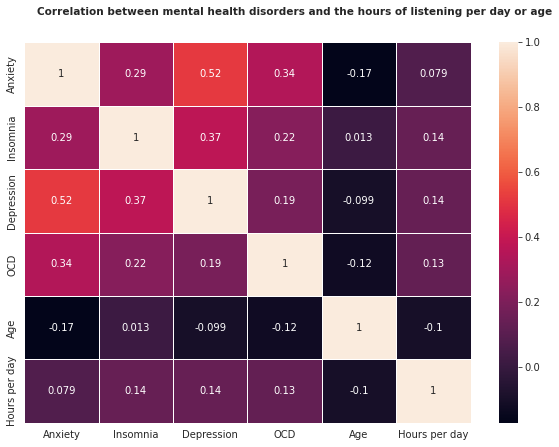

In [ ]:
plt.figure(figsize=(10,7))

# Create the correlation heatmap
sns.heatmap(df_corr, annot=True, linewidth=.5)

# Add a suptitle
plt.suptitle('Correlation between mental health disorders and the hours of listening per day or age', y=.95, fontsize=10.5, fontweight='bold')

plt.show()

**Correlation between mental health disorders and the hours of listening per day or age.** The heat map shows the correlation coefficient, describing the extent of the linear relationship between two variables. The variables are anxiety, insomnia, depression, OCD, age and hours per day. A value of r = 0 (purple spectrum) indicates no correlation (the variables are independent) and r =  ± 1 (beige) indicates the variables are inversely correlated (an increase in one variable is associated with a decrease in the other). High correlations are indicated by values of ±0.6 to ± 1 (orange spectrum). Overall no high correlation can be seen in the graph. There is also no correlation between the different mental health disorders and age or hours per day. However, there are weaker correlations between Anxiety and Depression (0.52), and Depression and Insomnia (0.52) as well as OCD and Anxiety (0.34).

**7. Question: What is the distribution of the favourite genre for different mental health disorders? Can we observe any relation?**

Given that there is no correlation between the different mental health disorders and “age” and “hours per day”, we now look closer into, if there are any relations between the favourite genre and each mental health disorder. We chose to use bar plots here, which give an overview of the different options for the favourite genres in relation to the given intensity ratings for each mental health disorder.

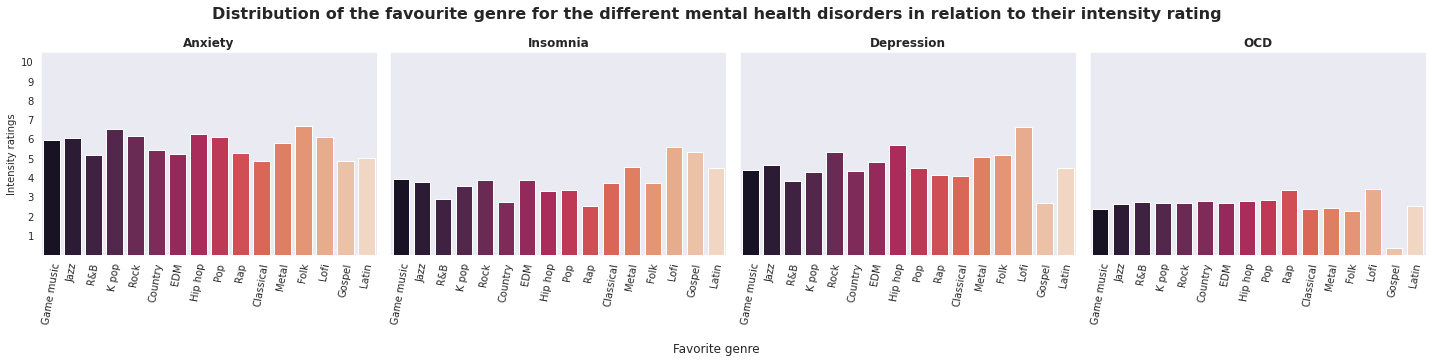

In [ ]:
# Set the style for the plot
sns.set_style('dark')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5), sharey=True)

for i, col in enumerate(['Anxiety', 'Insomnia', 'Depression', 'OCD']): # for each mental health disorder
    # Create a bar plot
    sns.barplot(y=df[col], x=df['Fav genre'], errwidth=0, palette='rocket', ax=ax[i])
    # Set title
    ax[i].set_title(col, fontweight='bold')
    # Rotate xticks and delete xlabel
    ax[i].tick_params(axis='x', rotation=80)
    ax[i].set_xlabel('')
    # Change the ylabel
    ax[i].set_ylabel('Intensity ratings')
    # Only keep the outmost label
    ax[i].label_outer()

# Add custom xlabel and change yticks
fig.supxlabel('Favorite genre')
plt.yticks(np.arange(1,10+1,1))

# Add a title
plt.suptitle('Distribution of the favourite genre for the different mental health disorders in relation to their intensity rating', y=.98, fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

**Distribution of the favourite genre for the different mental health disorders in relation to their intensity rating.** Overall, given the different means for mental health disorders (see question 2), it can be seen that there is no relation between a certain favourite genre and the intensity of a mental health disorder. For each disorder, the possible genres are evenly distributed within the barplot.



**8. Question: Is there a relation between the frequency of listening to a specific music genre and the diffrent mental health disorder?**

Given that there is no relation between the stated favourite genre and the different mental health disorders, we now look if there might be a relation to how frequently certain genres are listened to. We decided to check for the three most stated favourite genres: metal, rock and pop (see question 3). We compare the stated intensity of the mental health disorders with how frequently those three genres are listened to (never, rarely, sometimes, very frequently). For this purpose, we used a line plot. Lineplots allow for a visual connection between given answers over scale. Furthermore, a regression line makes it very easy and clear to see if they are any relations.

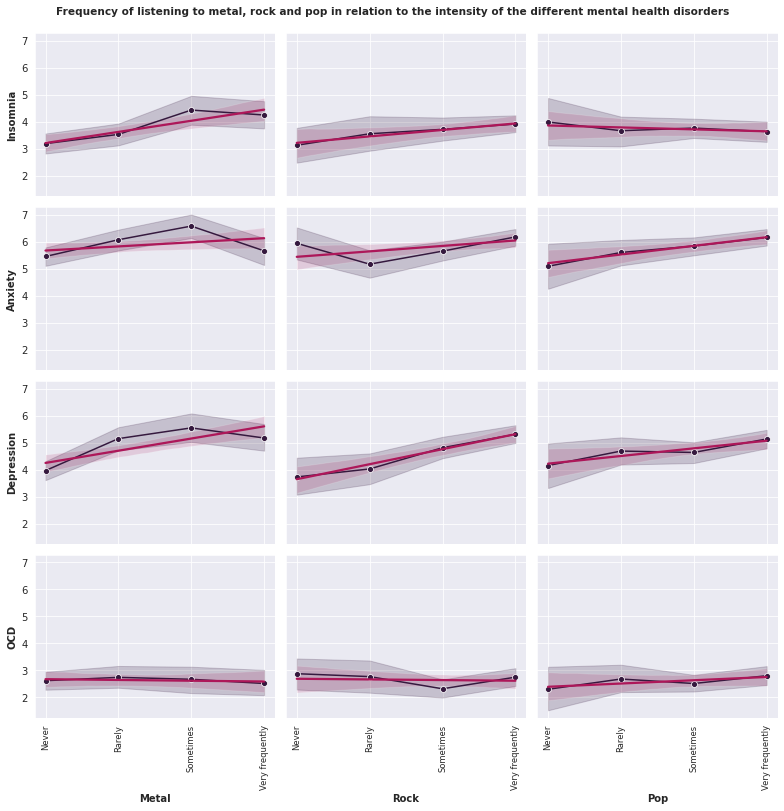

In [ ]:
# Set the style of the plot
sns.set_style('darkgrid')
color=sns.color_palette('rocket')[0:3:2]

# Create a copy of our DataFrame with numerical values for the all the frequency columns
genre_freq = df.copy()
genre_freq = genre_freq.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'], [0, 1, 2, 3])

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(11,11), sharex=True, sharey=True)

for i, disorder in enumerate(['Insomnia', 'Anxiety', 'Depression', 'OCD']): # for each mental health disorder
    for j, genre in enumerate(['Metal', 'Rock', 'Pop']): # for the top 3 genres
        # Create a lineplot
        sns.lineplot(data=genre_freq, y=disorder, x=genre, marker='o', color=color[0], ax=ax[i,j])
        # Create a regression line
        sns.regplot(data=genre_freq, y=disorder, x=genre, scatter=False, color=color[1], ax=ax[i,j])

for ax in ax.flat:
    # Rename the xticks and rotate them
    ax.set_xticks(np.arange(0,4,1), ['Never', 'Rarely', 'Sometimes', 'Very frequently'])
    ax.tick_params(axis='x', labelsize='small', labelrotation=90)
    # MAke the labels bold
    ax.xaxis.label.set_fontweight('bold')
    ax.yaxis.label.set_fontweight('bold')
    
plt.tight_layout()
# Add a title
plt.suptitle('Frequency of listening to metal, rock and pop in relation to the intensity of the different mental health disorders', y=1.02, fontsize=10.5, fontweight='bold')

plt.show()

**Frequency of listening to metal, rock and pop in relation to the intensity of the different mental health disorders.**  For metal and rock the same pattern can be seen over all four mental health disorders: There might be a negative relation for insomnia, anxiety and depression. The more frequently participants listened to metal the higher their rated the intensity for the disorder. However, this relation is when only marginal since the increase in rating is only about one point at maximal. Within OCD there is no difference between rated intensity and listening frequency. Within pop, a different pattern for insomnia can be seen. There is a slight decrease within the intensity rating the frequent participants listened to, indicating a positive relation. However, this again is only very marginal with 0.5 points. For anxiety, depression and here also OCD, a negative relation can be seen, with an increase in intensity rating the more frequently listened to. Again this relation is when only marginal since the increase in rating is only about one point at maximal.

**9. Question: Are there effects of music on different mental health disorders? Is there any relation observed?**

Lastly, we wanted to look closer at how participants rated the effect of music (no effect, worsen, improved) for the different mental health disorders. Here we used a stacked bar plot, in order to allow a side-by-side comparison of the different intensity ratings. 

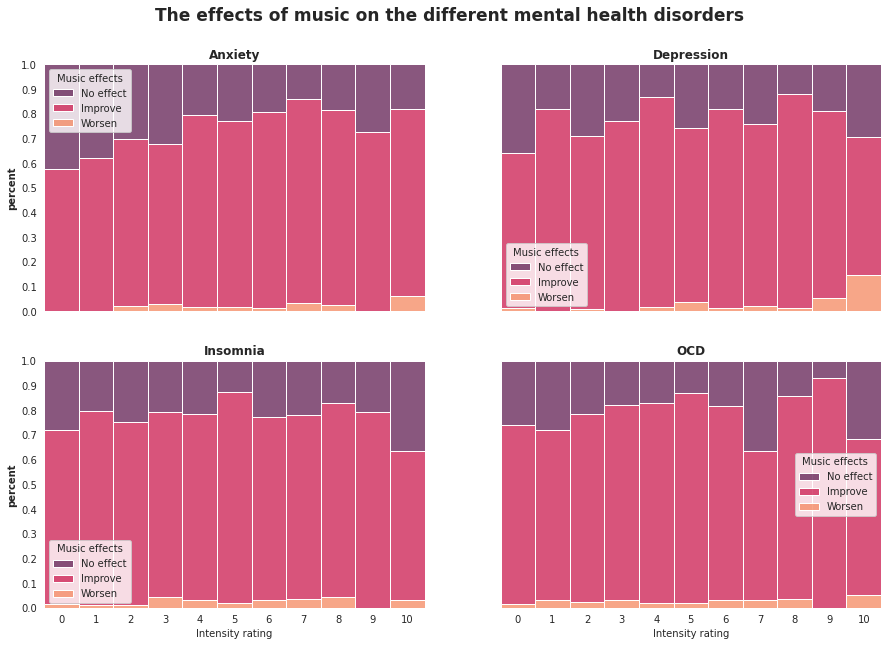

In [ ]:
sns.set_style('white')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=True)

for i, var in enumerate(['Anxiety', 'Depression', 'Insomnia', 'OCD']): # for each mental health disorder
    # Determine on which axis the subplot should go
    row, col = i//2, i%2
    # Create a histplot
    sns.histplot(data=df, x=var, hue='Music effects', discrete=True, binrange=(0,10), multiple="fill", palette='rocket', ax=ax[row, col])
    # Get rid of all spines
    sns.despine(left=True, bottom=True)
    # Change x- and yticks
    ax[row, col].set_xticks(np.arange(0,10+1,1))
    ax[row, col].set_yticks(np.arange(0,1+0.1,0.1))
    # Set title, x- and ylabel
    ax[row, col].set_xlabel('Intensity rating')
    ax[row, col].set_title(var, fontweight='bold')
    ax[row, col].set_ylabel("percent", fontweight='bold')

# Add a suptitle
plt.suptitle('The effects of music on the different mental health disorders', y=.96, fontsize=17, fontweight='bold')

plt.show()

**The effects of music on the different mental health disorders.** It can be very clearly seen that overall for all four mental health disorders, the majority, around 60% every time, of participants reported that music has an improving effect on their mental health disorder, regardless of how intense they rated them. Only very few reported experiencing a negative effect (“worse”) for music. Here especially for high depression ratings (intensity 9 and 10) a percentage of up to 15% for worsening can be seen. Furthermore, the amount of participants reporting that there is no effect of music for them is also mostly evenly distributed over all four disorders and intensity ratings.

## Conclusion

The majority of all data was s collected from participants around the age of 15 to 25, with listening hours from 1 to 6 hours per day. Overall anxiety is the highest-rated experienced disorder (median 6), OCD the lowest-rated one (median 2) and depression (median 5) and insomnia (median 3) are rated similarly moderate. There was no correlation between the different mental health disorders and age or hours per day. However, there are weaker positive correlations between anxiety and depression (0.52), depression and insomnia (0.52) as well as OCD and anxiety (0.34). We could not find any relation between a certain favourite genre and the intensity of a mental health disorder. However, looking into the frequency of listening to some genres (metal, pop, rock) we found that there might be a negative relation between insomnia, anxiety and depression. The more frequently participants listened to a genre the higher their rated the intensity of the disorder. But the found relations are rather marginal. However, the majority of participants reported music to have an improving effect on their mental health disorders regardless of how severe they rated them. This suggests that music could be used as an additional treatment for certain mental health disorders.

The dataset is allowing to explore far more relations and correlations than we did. For example, if the language of the music has an effect on the intensity of the mental health orders or how the music effect those. Also how the fact that someone can play an instrument themselves or is even a composer influences those questions above could be investigated. 

## References

GBD Results. (n.d.). Institute for Health Metrics and Evaluation. https://vizhub.healthdata.org/gbd-results/

Headquarters, W. (2022, March 2). Mental Health and COVID-19: Early evidence of the pandemic’s impact: Scientific brief, 2 March 2022. https://www.who.int/publications/i/item/WHO-2019-nCoV-Sci_Brief-Mental_health-2022.1

Mental disorders. (2022, June 8). https://www.who.int/news-room/fact-sheets/detail/mental-disorders

Music & Mental Health Survey Results. (2022, November 21). Kaggle. https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results?resource=download

Music and the Brain. (n.d.). https://neuro.hms.harvard.edu/centers-and-initiatives/harvard-mahoney-neuroscience-institute/about-hmni/archive-brain-1. 

Course: Action & Cognition: Computational Cognition

Instructor: M.Sc Ashima Keshava


A Survey-Based Exploration of Music's Impact on Mental Health

by

Fatemeh Akrami, 998122

Fynn Aurand, 990040

Katarzyna Olszynska, 1000023

Juliane Thiesen, 968414